<a href="https://colab.research.google.com/github/tvvshehri/DA-PROJECT/blob/main/2nd_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyxlsb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import files
uploaded= files.upload()

Saving stc TV Data Set_T2 (8).xlsx to stc TV Data Set_T2 (8).xlsx


In [3]:
import pandas as pd

In [4]:
import io 
dataframe = pd.read_excel(io.BytesIO(uploaded['stc TV Data Set_T2 (8).xlsx']))

In [5]:
dataframe.head()

,i,ds,Total_watch_time_in_houres
0,0,2018-01-01,1123.551944
1,1,2018-01-02,1000.129722
2,2,2018-01-03,881.924444
3,3,2018-01-04,782.669444
4,4,2018-01-05,1051.939444


In [6]:
dataframe.drop(['i'], axis=1, inplace=True)

In [7]:
dataframe.head()

,ds,Total_watch_time_in_houres
0,2018-01-01,1123.551944
1,2018-01-02,1000.129722
2,2018-01-03,881.924444
3,2018-01-04,782.669444
4,2018-01-05,1051.939444


In [8]:
import pandas as pd    
import pyxlsb          
import numpy as np      
import matplotlib.pyplot as plt 
import plotly 
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from prophet import Prophet

In [9]:
#dataframe.set_index('ds', inplace=True)

In [10]:
expected_total_watch = px.line(dataframe,  y= "Total_watch_time_in_houres")

In [11]:
dataframe.head()

,ds,Total_watch_time_in_houres
0,2018-01-01,1123.551944
1,2018-01-02,1000.129722
2,2018-01-03,881.924444
3,2018-01-04,782.669444
4,2018-01-05,1051.939444


In [12]:
expected_total_watch.show()

In [13]:
m = Prophet(interval_width=0.95, daily_seasonality=True)

In [14]:
dataframe.rename(columns={'date_':'ds', 'Total_watch_time_in_houres':'y'}, inplace=True)

In [15]:
model = m.fit(dataframe)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9tijs01y/fbp9lhw_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9tijs01y/fyeupsh2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73253', 'data', 'file=/tmp/tmp9tijs01y/fbp9lhw_.json', 'init=/tmp/tmp9tijs01y/fyeupsh2.json', 'output', 'file=/tmp/tmp9tijs01y/prophet_modelcquy2ibv/prophet_model-20230102123246.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:32:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:32:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [16]:
future = m.make_future_dataframe(periods=100, freq='D')
forecast = m.predict(future)

In [18]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,51.430141,740.992807,1106.844140,51.430141,51.430141,874.263328,874.263328,874.263328,821.882742,821.882742,821.882742,52.380586,52.380586,52.380586,0.0,0.0,0.0,925.693469
1,2018-01-02,49.152484,736.757872,1092.992420,49.152484,49.152484,863.628963,863.628963,863.628963,821.882742,821.882742,821.882742,41.746221,41.746221,41.746221,0.0,0.0,0.0,912.781447
2,2018-01-03,46.874827,702.561840,1085.864213,46.874827,46.874827,846.955333,846.955333,846.955333,821.882742,821.882742,821.882742,25.072592,25.072592,25.072592,0.0,0.0,0.0,893.830160
3,2018-01-04,44.597170,719.213802,1075.197601,44.597170,44.597170,850.882786,850.882786,850.882786,821.882742,821.882742,821.882742,29.000044,29.000044,29.000044,0.0,0.0,0.0,895.479956
4,2018-01-05,42.319513,735.216925,1089.635154,42.319513,42.319513,879.154005,879.154005,879.154005,821.882742,821.882742,821.882742,57.271263,57.271263,57.271263,0.0,0.0,0.0,921.473518


In [19]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
181,2018-08-04,-438.266109,110.473010,458.636257,-438.266182,-438.266038,719.147411,719.147411,719.147411,821.882742,821.882742,821.882742,-102.735330,-102.735330,-102.735330,0.0,0.0,0.0,280.881302
182,2018-08-05,-440.543766,101.714233,467.157754,-440.543840,-440.543695,719.147365,719.147365,719.147365,821.882742,821.882742,821.882742,-102.735376,-102.735376,-102.735376,0.0,0.0,0.0,278.603599
183,2018-08-06,-442.821423,248.755559,617.615255,-442.821498,-442.821351,874.263328,874.263328,874.263328,821.882742,821.882742,821.882742,52.380586,52.380586,52.380586,0.0,0.0,0.0,431.441905
184,2018-08-07,-445.099080,244.295376,606.670793,-445.099155,-445.099007,863.628963,863.628963,863.628963,821.882742,821.882742,821.882742,41.746221,41.746221,41.746221,0.0,0.0,0.0,418.529883
185,2018-08-08,-447.376737,209.966287,584.518980,-447.376813,-447.376662,846.955333,846.955333,846.955333,821.882742,821.882742,821.882742,25.072592,25.072592,25.072592,0.0,0.0,0.0,399.578596


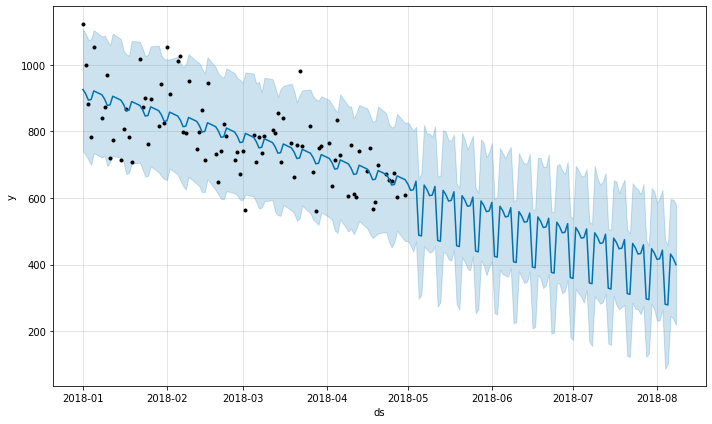

In [ ]:
fig1 = m.plot(forecast)

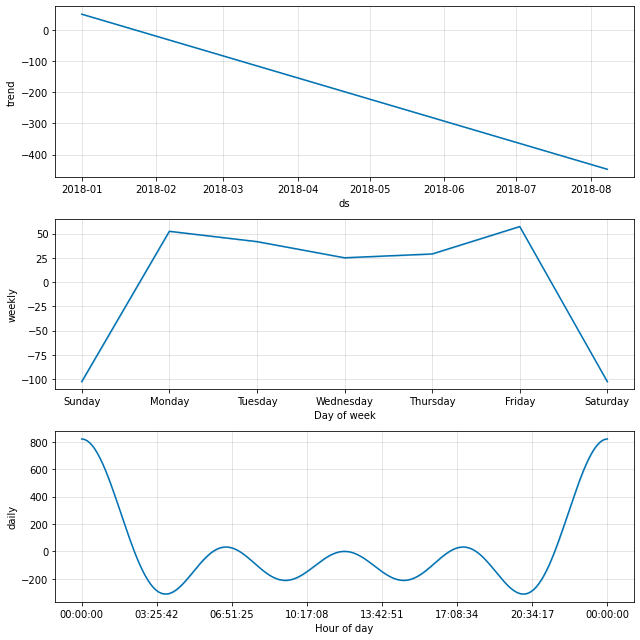

In [ ]:
fig2 = m.plot_components(forecast)